# Movie Analysis for Microsoft Studios

**Author:** Ronald Lodetti Jr.
***

## Overview

A one-paragraph overview of the project, including the 
business problem, 
data, 
methods, 
results and 
recommendations.

Microsoft would like to create a movie studio, but needs to better understand the movie landscape to help determine which kind of movies to produces. The data used in this project come from The Numbers and IMDB. 


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project? 
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
*** 

As a new competitor in the field of movie production, Microsoft does not have a history to inform business decisions. They need analysis of current trends to help inform their first steps.

My first instinct was to look into the Box Office Mojo data to determine the most and least successful movie studios, identify patterns, and make recommendations to help Microsoft be successful. After thorough analysis, the results were inconclusive due to many reasoning including the size of the datasets. I then decided to pivot to most and least successful producers and look for similar patterns. 

I initially determined success of a movie by it's profit - the difference between a movie's gross box office and its production budget. After analysis, I determined that it came up with conclusions not suited to Microsoft's needs. For example, the most profitable movies tend to have very large budgets, but it doesn't seem prudent to recommend Microsoft make movies with very large budgets to start out, especially as I only found a correlation between budget and profit. Based on this I decided to focus on return on investment, a ratio of profit to budget, as a metric for box office success.

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

The data used in this project has come from <a href="https://www.the-numbers.com/">The Numbers</a> and <a href="https://www.imdb.com/">IMDb</a>. These data sets were combiled by The Flatiron School to be used in this project. 

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
box_office = pd.read_csv(
    '/Users/ronlodetti/Documents/Flatiron/1_phase/Project_1/Movie_Analysis_Project/data/imported/tn.movie_budgets.csv.gz')
conn = sqlite3.connect(
    '/Users/ronlodetti/Documents/Flatiron/1_phase/Project_1/Movie_Analysis_Project/data/imported/im.db')
q = """
SELECT 
    movie_id,
    primary_title AS title,
    start_year AS year,
    runtime_minutes AS runtime,
    primary_name AS producer,
    genres
FROM movie_basics 
JOIN principals
    USING('movie_id')
JOIN persons
    USING('person_id')
WHERE job == 'producer'
;
"""
imdb = pd.read_sql(q, conn)

### The Numbers

The box office dataset, from The Numbers, includes the finances a sampling of movies about 5700 movies ranging from 1915 to 2020. This dataset will be used to calculate the ROI for each movie.

In [ ]:
box_office.head()

### IMDb Data
The imdb dataset comes from the imdb database. This table was created by merging the movie_basics, persons, and principals tables, filtering the merged rows for persons whos job is a producer. 

This dataset includes information about over 67,000 movies and 64,000 producers ranging from 2010 to 2021. The genre dataset includes up to three genres associated with each movie from a list of 27 genres.

In [ ]:
imdb.head()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### Data Cleaning

For the box office dataset I cleaned and converted the 'production_budget' and 'worldwide_gross' columns to integers. I also extracted the year from the 'release_date' column. 

For the imdb dataset, I converted the genres column into a list, then expanded each element in the list into its own row, replicating the other associated data. 

For both datasets, I cleaned the movie titles. Lastly, I normalized the column names and dropped unnecessary columns.

In [3]:
from my_package import data_prep as dp

In [4]:
box_office = dp.prep_box_office(box_office)
imdb = dp.prep_imdb(imdb)
movies = dp.merge(box_office,imdb)
movies.head()

,title,year,budget,worldwide_gross,movie_id,runtime,producer,genres
0,avengersageofultron,2015,330600000,1403013963,tt2395427,141.0,Kevin Feige,Action
1,avengersageofultron,2015,330600000,1403013963,tt2395427,141.0,Kevin Feige,Adventure
2,avengersageofultron,2015,330600000,1403013963,tt2395427,141.0,Kevin Feige,Sci-Fi
3,thedarkknightrises,2012,275000000,1084439099,tt1345836,164.0,Emma Thomas,Action
4,thedarkknightrises,2012,275000000,1084439099,tt1345836,164.0,Emma Thomas,Thriller


### Feature Engineering

I created a ROI column to use as my measure of success. To make the 'producer_rank' column, I first found the top and bottom 5 producers ranked by median ROI for producers with a minimum of 7 movies in the dataset. 


In [5]:
movies = dp.add_features(movies)
movies.head()

,title,year,budget,worldwide_gross,movie_id,runtime,producer,genres,ROI,producer_rank
0,avengersageofultron,2015,330600000,1403013963,tt2395427,141.0,Kevin Feige,Action,324.384139,NaN
1,avengersageofultron,2015,330600000,1403013963,tt2395427,141.0,Kevin Feige,Adventure,324.384139,NaN
2,avengersageofultron,2015,330600000,1403013963,tt2395427,141.0,Kevin Feige,Sci-Fi,324.384139,NaN
3,thedarkknightrises,2012,275000000,1084439099,tt1345836,164.0,Emma Thomas,Action,294.341491,NaN
4,thedarkknightrises,2012,275000000,1084439099,tt1345836,164.0,Emma Thomas,Thriller,294.341491,NaN


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***



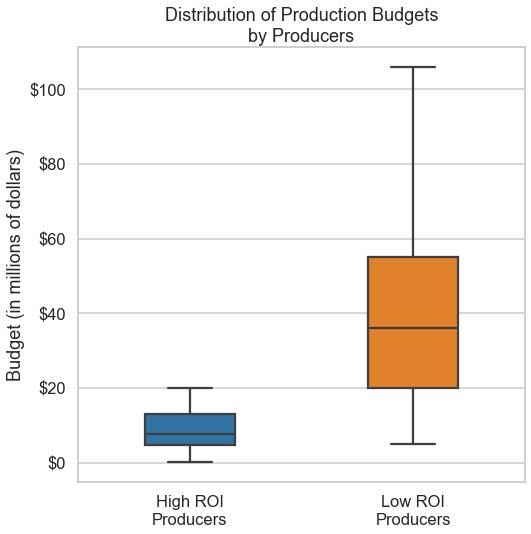

In [6]:
from my_package import visualizations as viz
viz.producer_budget(movies)

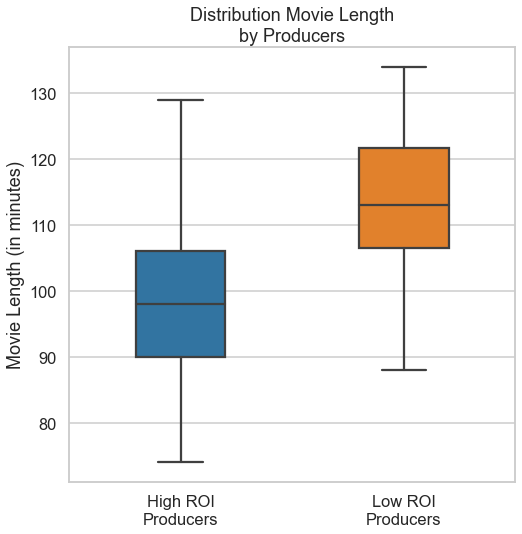

In [7]:
viz.producer_runtime(movies)

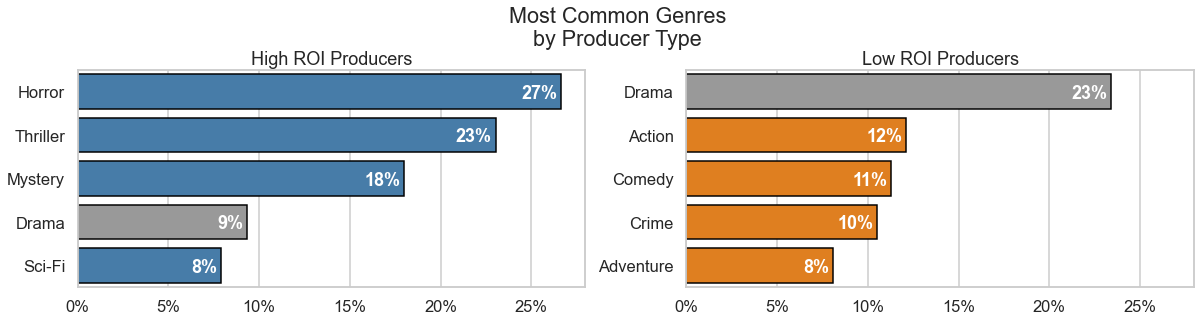

In [8]:
viz.producer_genre(movies)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

# Business Understanding

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Data Understanding

## Data Preparation

# Exploratory Data Analysis

# Conclusions

## Limitations

# Recommendations

## Next Steps